In [5]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm#_notebook as tqdm


In [6]:
folder = '/home/rob/HWR/datasets/zooniverse/**/Label*00[2,4][0-9].jpg'
fps = glob(folder)
for fp in fps:
    pass
#    os.remove(fp)
#    break

100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


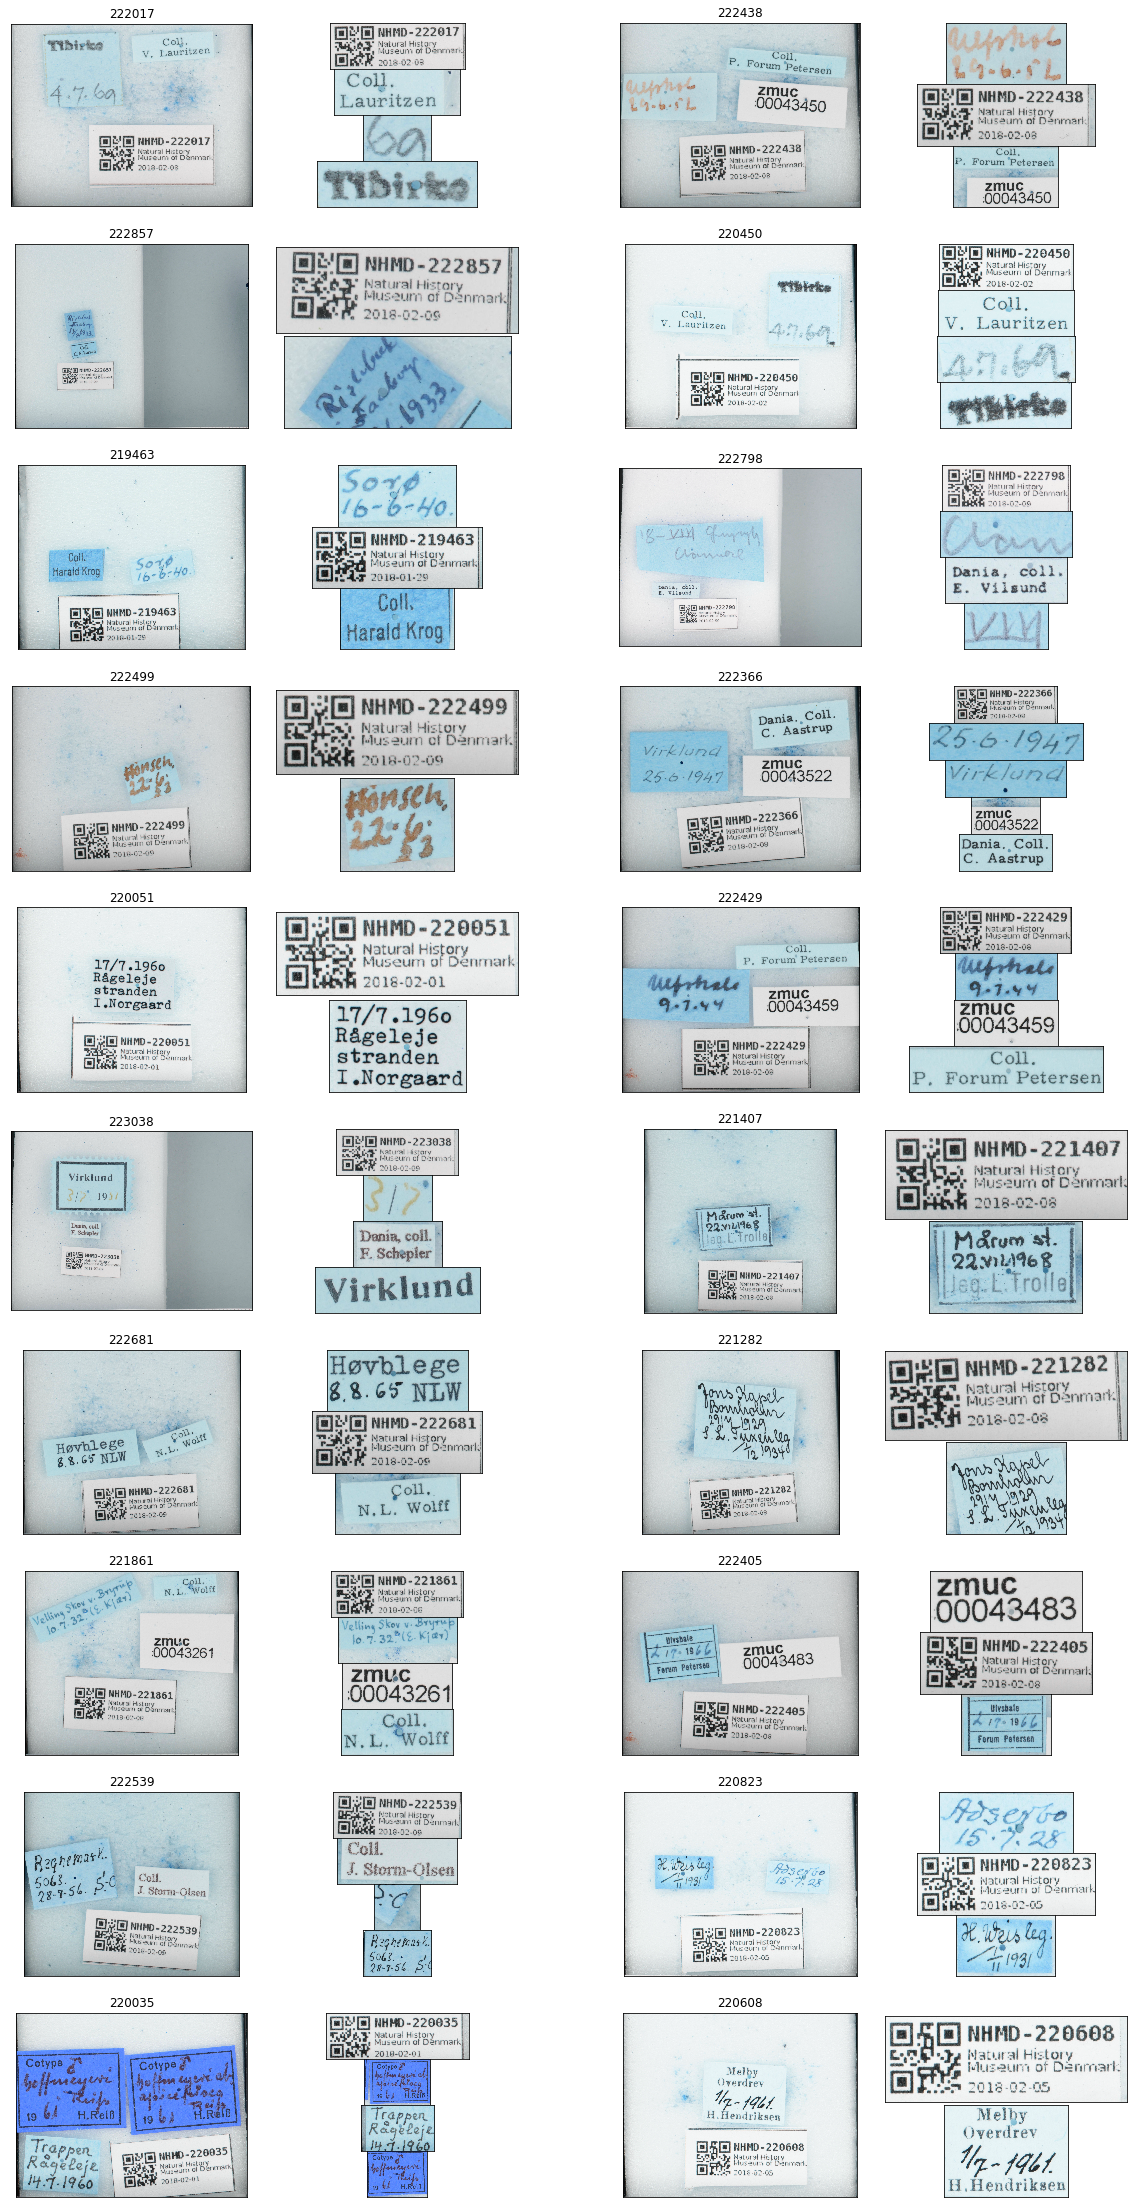

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig=plt.figure(figsize=(20, 40))
columns = 2
rows = 10
n_images = columns*rows

folderGlob = '/home/rob/HWR/datasets/zooniverse/**/Label*00[2,4][0-9].jpg'
label_fps = glob(folderGlob)
data = [(fp.split('/')[6],fp.split('Label')[1].split('.jpg')[0][:3]) for fp in label_fps]

fps = []
for catalog_no, img_no in data:
    fps += ['/home/rob/HWR/datasets/zooniverse/%s/Cropped%s.jpg'%(catalog_no, img_no)]


sample = np.random.permutation(fps)#[:300])

outer = gridspec.GridSpec(rows, columns, wspace=0.2, hspace=0.2)

for i in tqdm(range(n_images)):
    fp = sample[i]
    catalog_no = fp.split('/')[6]
    img_no = fp.split('Cropped')[1].split('.jpg')[0]
    label_glob = '/home/rob/HWR/datasets/zooniverse/' + catalog_no +  '/Label' + img_no + '[0-9].jpg'
    labels_fp =  glob(label_glob)
    n_labels = len(labels_fp)
    
    image = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    
    ax = plt.Subplot(fig, image[0])
    #t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
    #t.set_ha('center')
    ax.imshow(cv2.imread(fp))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(str(catalog_no))
    fig.add_subplot(ax)
    
    labels = gridspec.GridSpecFromSubplotSpec(n_labels,1,subplot_spec=image[1],wspace=0,hspace=0)
    
    for j in range(n_labels):
        ax = plt.Subplot(fig, labels[j])
        #t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
        #t.set_ha('center')
        ax.imshow(cv2.imread(labels_fp[j]))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

In [9]:
cv2.imread(fp).shape

(2746, 3480, 3)

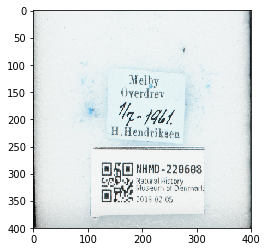

In [11]:
plt.imshow(cv2.resize(cv2.imread(fp),(400,400)))